In [64]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

file = "titanicFull.csv"
df = pd.read_csv(file)

In [65]:
# Cetak 4 baris pertama dari kumpulan data
df.head(4)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S


In [66]:
# Cetak 6 baris terakhir dari kumpulan data
df.iloc[-6:]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
1303,3,0,"Yousseff, Mr. Gerious",male,NaN,0,0,2627,14.4583,NaN,C
1304,3,0,"Zabour, Miss. Hileni",female,14.5,1,0,2665,14.4542,NaN,C
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5,0,0,2656,7.2250,NaN,C
1307,3,0,"Zakarian, Mr. Ortin",male,27.0,0,0,2670,7.2250,NaN,C
1308,3,0,"Zimmerman, Mr. Leo",male,29.0,0,0,315082,7.8750,NaN,S


In [67]:
# Dapatkan info umum tentang kumpulan data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1309 non-null   int64  
 1   survived  1309 non-null   int64  
 2   name      1309 non-null   object 
 3   sex       1309 non-null   object 
 4   age       1046 non-null   float64
 5   sibsp     1309 non-null   int64  
 6   parch     1309 non-null   int64  
 7   ticket    1309 non-null   object 
 8   fare      1308 non-null   float64
 9   cabin     295 non-null    object 
 10  embarked  1307 non-null   object 
dtypes: float64(2), int64(4), object(5)
memory usage: 112.6+ KB


# Answer
# - Pclass: Passenger class  (1=1st; 2=2nd; 3=3rd - Categorical - ordinal - transformed into 1,2,3))
# - Survived: Survival (0=No; 1=Yes - Categorical - nominal - transformed into 0 and 1)
# - Name: Passenger's name (Text)
# - Sex: Passenger's sex (Categorical - nominal)          
# - Age: Passenger's age (Numerical - discrete)       
# - SibSp: Number of Siblings/Spouses Aboard (Numerical - discrete)       
# - Parch: Number of Parents/Children Aboard (Numerical - discrete)       
# - Ticket: Ticket number (Text)       
# - Fare: Passenger fare (Numerical - continuous)       
# - Cabin: Cabin number (Categorical - nominal) 
# - Embarked: Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)


In [68]:
#Menampilkan bentuk data
df.shape

(1309, 11)

In [69]:
#Menampilkan kolom dataframe
df.columns

Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked'],
      dtype='object')

In [70]:
df.rename(index=str, columns={"pclass":"ticketClass", "sibsp":"siblingsSpouses", "parch":"parentsChildren"}, inplace=True)
# Menampilkan data kolom (variabel) lebih mudah untuk dibaca
df.columns


Index(['ticketClass', 'survived', 'name', 'sex', 'age', 'siblingsSpouses',
       'parentsChildren', 'ticket', 'fare', 'cabin', 'embarked'],
      dtype='object')

In [71]:
#Apakah ada catatan duplikat

duplicated = df.duplicated().sum()
print("There are %d duplicated records" % (duplicated))

There are 0 duplicated records


In [72]:
#Salin kumpulan data sehingga Anda memanipulasi kumpulan data yang disalin dan membiarkan yang asli tidak terpengaruh
dff = df.copy()

In [73]:

# Tampilkan missing data and urutkan dalam urutan secara ascending (naik) missingDataSummary	= dff.isna().sum()
missingDataSummary	= dff.isna().sum()
# Hitung persentase of missing data
missingDataPercentage = (dff.isnull().sum()/dff.shape[0])
# Gabungkan dua Seri
missingData = pd.concat([missingDataSummary, missingDataPercentage], axis=1, keys=['Missing','Percentage'])
missingData.sort_values(ascending=False, by='Missing')


,Missing,Percentage
cabin,1014,0.774637
age,263,0.200917
embarked,2,0.001528
fare,1,0.000764
ticketClass,0,0.000000
survived,0,0.000000
name,0,0.000000
sex,0,0.000000
siblingsSpouses,0,0.000000
parentsChildren,0,0.000000


In [74]:
# Kita perlu membuang variabel Cabin karena data yang hilang adalah 77% dari total data
dffClean = dff.drop(columns='cabin')
dffClean.isna().sum().sort_values(ascending=False)


age                263
embarked             2
fare                 1
ticketClass          0
survived             0
name                 0
sex                  0
siblingsSpouses      0
parentsChildren      0
ticket               0
dtype: int64

In [75]:
#Isi missing data yang memiliki tipe categorical dengan mode
dffClean.info() 
dff.isna().sum()
dffClean[dffClean['embarked'].isna()]
dffClean['embarked'] = dffClean['embarked'].fillna(dffClean['embarked'].mode()[0])
dffClean.isna().sum().sort_values(ascending=False)


<class 'pandas.core.frame.DataFrame'>
Index: 1309 entries, 0 to 1308
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ticketClass      1309 non-null   int64  
 1   survived         1309 non-null   int64  
 2   name             1309 non-null   object 
 3   sex              1309 non-null   object 
 4   age              1046 non-null   float64
 5   siblingsSpouses  1309 non-null   int64  
 6   parentsChildren  1309 non-null   int64  
 7   ticket           1309 non-null   object 
 8   fare             1308 non-null   float64
 9   embarked         1307 non-null   object 
dtypes: float64(2), int64(4), object(4)
memory usage: 112.5+ KB


age                263
fare                 1
ticketClass          0
survived             0
name                 0
sex                  0
siblingsSpouses      0
parentsChildren      0
ticket               0
embarked             0
dtype: int64

Text(0.5, 0, 'Age')

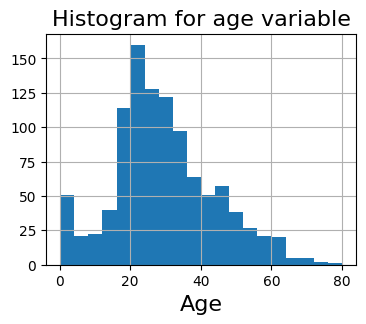

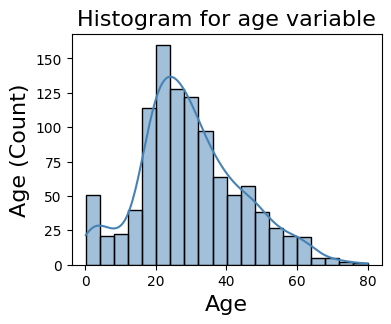

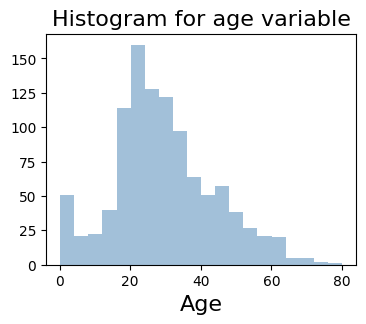

In [76]:
#Menggunakan pandas
plt.figure(figsize=(4,3), dpi=100) 
ax = dffClean['age'].hist(bins=20)
ax.set_title("Histogram for age variable",fontsize=16) 
ax.set_xlabel('Age', fontsize=16)                  # set x label ax.set_ylabel('Age (Count)', fontsize=16, rotation=90) # set y label ax.grid(False)
#Menggunakan seaborn
plt.figure(figsize=(4,3), dpi=100)
g = sns.histplot(dffClean, x='age', kde=True, color='steelblue', bins=20) 
g.set_title("Histogram for age variable",fontsize=16)
g.set_xlabel('Age', fontsize=16)                  # set x label
g.set_ylabel('Age (Count)', fontsize=16, rotation=90) # set y label
#Menggunakan matplotlib
plt.figure(figsize=(4,3), dpi=100)
plt.hist(dffClean['age'], bins=20, alpha=0.5, density=False,histtype='stepfilled', color='steelblue', edgecolor='none')
# alpha=0.5 -> transparent level
plt.title("Histogram for age variable",fontsize=16) 
plt.xlabel('Age',fontsize=16)                  # set x label plt.ylabel('Age (Count)',fontsize=16,rotation=90) # set y label


<class 'pandas.core.frame.DataFrame'>
Index: 1309 entries, 0 to 1308
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ticketClass      1309 non-null   int64  
 1   survived         1309 non-null   int64  
 2   name             1309 non-null   object 
 3   sex              1309 non-null   object 
 4   age              1046 non-null   float64
 5   siblingsSpouses  1309 non-null   int64  
 6   parentsChildren  1309 non-null   int64  
 7   ticket           1309 non-null   object 
 8   fare             1308 non-null   float64
 9   embarked         1309 non-null   object 
dtypes: float64(2), int64(4), object(4)
memory usage: 144.8+ KB


Text(0, 0.5, 'Age (Count))')

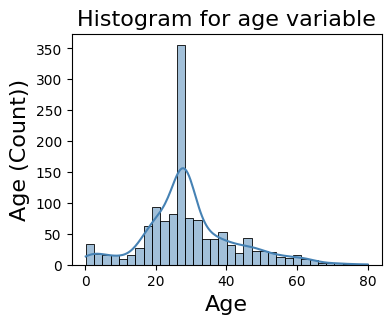

In [77]:
# Isi missing values dengan nilai yang sesuai
dffClean.info() 
dff.isna().sum()
dffClean[dffClean['age'].isna()]
dffClean['age'] = dffClean['age'].fillna(dffClean['age'].median())
dffClean.isna().sum().sort_values(ascending=False) 
#Plot histogram lagi untuk variabel dari tugas T13 setelah imputasi dan amati bagaimana distribusinya berubah.
#Using seaborn
plt.figure(figsize=(4,3), dpi=100)
g = sns.histplot(dffClean, x='age', kde=True, color='steelblue')
g.set_title("Histogram for age variable",fontsize=16)
g.set_xlabel('Age', fontsize=16)                  # set x label
g.set_ylabel('Age (Count))', fontsize=16, rotation=90) # set y label


In [78]:
dffClean[dffClean['fare'].isna()]
#Karena nilai yang hilang adalah tarif, kemungkinan tiket dari kelas yang sama mewakili distribusi tarif yang lebih baik. Dengan demikian, kita dapat menghitung nilai yang hilang dengan nilai rata-rata/median tarif tiket dari kelas 3.
dffClean['ticketClass'].unique()
#Get the ticket class, i.e., 3
ticketClass = dffClean[dffClean['fare'].isna()]['ticketClass']
if (len(ticketClass)>0):
#Find the median fare of tickets from class 3
    fareMedian = dffClean[dffClean['ticketClass']==ticketClass[0]]['fare'].median()
#impute the value

dffClean['fare'] = dffClean['fare'].fillna(fareMedian)
dffClean.isna().sum().sort_values(ascending=False)


C:\Users\Hernando\AppData\Local\Temp\ipykernel_21932\3508946566.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  fareMedian = dffClean[dffClean['ticketClass']==ticketClass[0]]['fare'].median()


ticketClass        0
survived           0
name               0
sex                0
age                0
siblingsSpouses    0
parentsChildren    0
ticket             0
fare               0
embarked           0
dtype: int64

In [79]:
#Simpan dataframe yang telah dibersihkan sebagai file csv dengan nama "titanicClean.csv"

file = "titanicClean.csv" 
dffClean.to_csv(file, index=False)

In [80]:
#Muat kumpulan data yang telah dibersihkan ke dalam kerangka data baru
titanicClean = pd.read_csv(file)
titanicClean.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ticketClass      1309 non-null   int64  
 1   survived         1309 non-null   int64  
 2   name             1309 non-null   object 
 3   sex              1309 non-null   object 
 4   age              1309 non-null   float64
 5   siblingsSpouses  1309 non-null   int64  
 6   parentsChildren  1309 non-null   int64  
 7   ticket           1309 non-null   object 
 8   fare             1309 non-null   float64
 9   embarked         1309 non-null   object 
dtypes: float64(2), int64(4), object(4)
memory usage: 102.4+ KB


In [81]:
#Dapatkan beberapa statistik deskriptif untuk kumpulan data yang hanya memilih variabel yang statistik deskriptifnya masuk akal
#fungsi deskripsi akan memberikan statistik deskriptif untuk variabel apa pun yang numerik #termasuk TicketClass; Namun, variabel ini tidak memiliki arti apapun #Oleh karena itu, mereka harus dimasukkan dalam kumpulan statistik deskriptif
titanicClean[['survived', 'age', 'siblingsSpouses', 'parentsChildren', 'fare']].describe()


,survived,age,siblingsSpouses,parentsChildren,fare
count,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000
mean,0.381971,29.503186,0.498854,0.385027,33.276193
std,0.486055,12.905241,1.041658,0.865560,51.743584
min,0.000000,0.170000,0.000000,0.000000,0.000000
25%,0.000000,22.000000,0.000000,0.000000,7.895800
50%,0.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,35.000000,1.000000,0.000000,31.275000
max,1.000000,80.000000,8.000000,9.000000,512.329200


In [82]:
#Untuk setiap penumpang, cari tahu berapa banyak total anggota keluarganya dan simpan informasi ini sebagai variabel baru dalam dataframe
titanicClean["familySize"] = titanicClean["siblingsSpouses"] + titanicClean["parentsChildren"] + 1


In [83]:
#Cetak catatan untuk keluarga dengan nama keluarga "Palsson" dan konfirmasikan bahwa hasil dari tugas T17i benar

titanicClean[titanicClean['name'].str.contains("Palsson")]


,ticketClass,survived,name,sex,age,siblingsSpouses,parentsChildren,ticket,fare,embarked,familySize
1096,3,0,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.075,S,5
1097,3,0,"Palsson, Master. Paul Folke",male,6.0,3,1,349909,21.075,S,5
1098,3,0,"Palsson, Miss. Stina Viola",female,3.0,3,1,349909,21.075,S,5
1099,3,0,"Palsson, Miss. Torborg Danira",female,8.0,3,1,349909,21.075,S,5
1100,3,0,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.075,S,5


In [84]:
#Cari tahu dan cetak detail informasi dari keluarga yang memiliki jumlah terbesar
#Solution1
titanicClean[titanicClean['familySize']==max(titanicClean["familySize"])]
#Solution2
biggestfamily = np.where(titanicClean["familySize"] == max(titanicClean["familySize"]))
titanicClean.iloc[biggestfamily]


,ticketClass,survived,name,sex,age,siblingsSpouses,parentsChildren,ticket,fare,embarked,familySize
1170,3,0,"Sage, Master. Thomas Henry",male,28.0,8,2,CA. 2343,69.55,S,11
1171,3,0,"Sage, Master. William Henry",male,14.5,8,2,CA. 2343,69.55,S,11
1172,3,0,"Sage, Miss. Ada",female,28.0,8,2,CA. 2343,69.55,S,11
1173,3,0,"Sage, Miss. Constance Gladys",female,28.0,8,2,CA. 2343,69.55,S,11
1174,3,0,"Sage, Miss. Dorothy Edith ""Dolly""",female,28.0,8,2,CA. 2343,69.55,S,11
1175,3,0,"Sage, Miss. Stella Anna",female,28.0,8,2,CA. 2343,69.55,S,11
1176,3,0,"Sage, Mr. Douglas Bullen",male,28.0,8,2,CA. 2343,69.55,S,11
1177,3,0,"Sage, Mr. Frederick",male,28.0,8,2,CA. 2343,69.55,S,11
1178,3,0,"Sage, Mr. George John Jr",male,28.0,8,2,CA. 2343,69.55,S,11
1179,3,0,"Sage, Mr. John George",male,28.0,1,9,CA. 2343,69.55,S,11


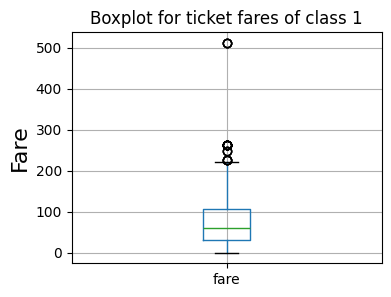

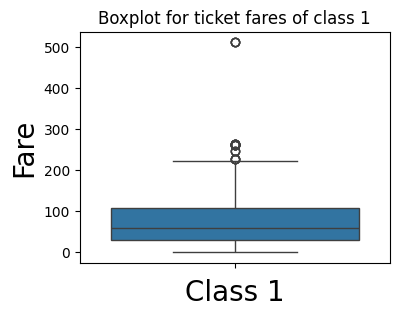

In [85]:
# Bagaimana pembagian tarif tiket kelas 1
#membuat boxplot dan selidiki informasi yang menarik

#using Pandas
plt.figure(figsize=(4,3), dpi=100)
ax = titanicClean[titanicClean['ticketClass']==1].boxplot(column='fare') 
ax.set_title("Boxplot for ticket fares of class 1") 
ax.set_ylabel('Fare',fontsize=16,rotation=90) # set y label ax.set_xlabel('Class 1',fontsize=16) ax.grid(False)
#Using seaborn 
d = titanicClean[titanicClean['ticketClass']==1]
plt.subplots(figsize=(4,3), dpi=100) 
ax = sns.boxplot(y="fare", data=d)
ax.set_title("Boxplot for ticket fares of class 1") 
ax.set_ylabel('Fare',fontsize=20,rotation=90) 
# set y label 
ax.set_xlabel('Class 1',fontsize=20) 
# set x label 
ax.grid(False)


In [86]:
# melihat nilai tarif yang aneh? Periksa apakah ada outlier untuk tarif tiket kelas 1 menggunakan metode standar deviasi
fareClass1 = titanicClean[titanicClean['ticketClass']==1]['fare']
fareStd = np.std(fareClass1) 
fareMean = np.mean(fareClass1) 
fareOutliers = fareClass1[(fareClass1 > fareMean + 3 *fareStd) | 
(fareClass1 < fareMean - 3 *fareStd)]
print("Mean=%.3f and standard deviation=%.3f of ticket fares for class 1" % 
(fareMean, fareStd))
print("The following could be considered as outliers %s" % (fareOutliers))


Mean=87.509 and standard deviation=80.323 of ticket fares for class 1
The following could be considered as outliers 49     512.3292
50     512.3292
183    512.3292
302    512.3292
Name: fare, dtype: float64


In [87]:
# Cetak informasi untuk penumpang tersebut

#Solution1 
titanicClean[titanicClean['fare']==fareOutliers.iloc[0]]
#Solution2
titanicClean.loc[fareOutliers.index]


,ticketClass,survived,name,sex,age,siblingsSpouses,parentsChildren,ticket,fare,embarked,familySize
49,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,C,2
50,1,1,"Cardeza, Mrs. James Warburton Martinez (Charlo...",female,58.0,0,1,PC 17755,512.3292,C,2
183,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,C,1
302,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,C,1


Text(0.5, 0, 'Port')

<Figure size 400x300 with 0 Axes>

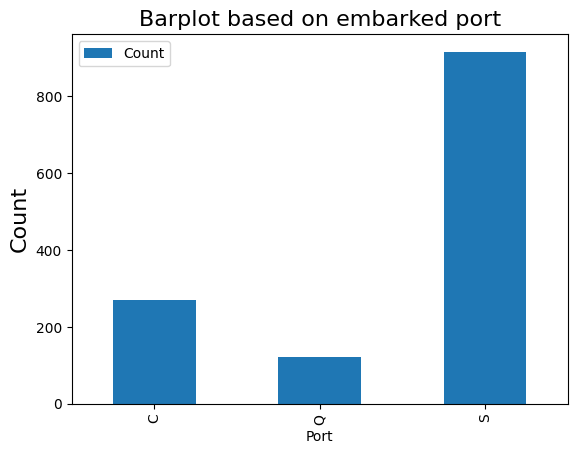

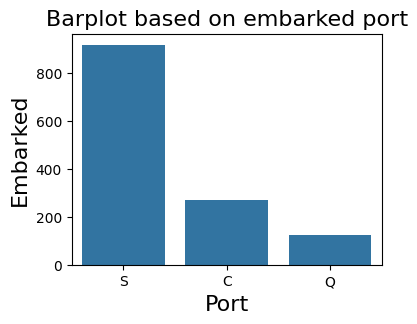

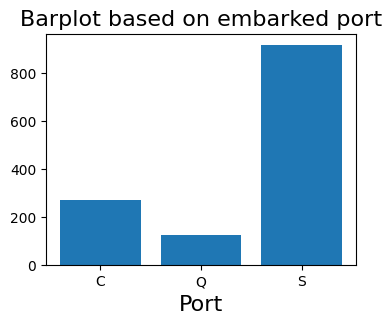

In [88]:
# Pertama-tama kita perlu mengelompokkan dataframe berdasarkan variabel embarked
embarked = titanicClean.groupby('embarked').count()
#Buat dataframe berdasarkan grouping
embarkedDf = pd.DataFrame({'Port': embarked.index, 'Count':embarked['ticketClass']})
#Finally, we plot the barplot
plt.figure(figsize=(4,3), dpi=100) 
ax = embarkedDf.plot.bar(x='Port', y='Count') 
ax.set_title("Barplot based on embarked port", fontsize=16) 
ax.set_ylabel('Count',fontsize=16,rotation=90)
 # set y label ax.set_xlabel('Port', fontsize=16) ax.grid(False)
#Using seaborn
plt.subplots(figsize=(4,3), dpi=100)
ax = sns.countplot(data=titanicClean, x='embarked') 
ax.set_title("Barplot based on embarked port", fontsize=16) 
ax.set_xlabel('Port',fontsize=16) # set x label
ax.set_ylabel('Embarked',fontsize=16,rotation=90) # set y label ax.grid(False)
#Using matplotlib
#Pertama-tama kita perlu mengelompokkan item data bersama-sama
#semua entri data pada dataframe yang dihasilkan menghitung jumlah penumpang yang berangkat di setiap Pelabuhan
# embarked = titanicClean.groupby('embarked').count().iloc[:,1] 
embarked = titanicClean.groupby('embarked').count()['ticketClass']
plt.figure(figsize=(4,3), dpi=100)
plt.bar(embarked.index, embarked) 
plt.title("Barplot based on embarked port", fontsize=16) 
plt.xlabel('Port',fontsize=16) # set x label plt.ylabel('embarked',fontsize=16,rotation=90) # set y label ax.grid(False)


In [89]:
# •	Buat kolom baru 'Title' yang menyertakan panggilan setiap penumpang dan hanya memiliki entri berikut:
# •	Master, Miss, Mr, Mss where
# •	Miss includes also Mlle and Ms
# •	Mme includes also Mrs
# •	all the remaining titles become Rare
sr = pd.Series(['New_York', 'Lisbon', 'Tokyo', 'Paris', 'Munich']) 
sr.str.extract('([auieo])') #sr.str.extract(pat = '([auieo])') 
sr = pd.Series(['USA New_York', 'Portugal Lisbon', 'Japan Tokyo', 'France Paris', 'Germany Munich']) 
sr.str.extract('([A-Za-z]+) ') 
sr.str.extract(' ([A-Za-z]+)')
s = pd.Series(['Allen, Miss. Elisabeth Walton', 'Anderson, Mr. Harry', 
'Astor, Col. John Jacob'])
s.str.extract('([A-Za-z,]+) ') 
s.str.extract(' ([A-Za-z,]+) ')
s.str.extract(' ([A-Za-z]+)\. ')
s.str.extract(' ([A-Za-z]+)\. ',expand=False)
titanicClean['Title'] = titanicClean.name.str.extract(' ([A-Za-z]+)\.', expand=False)
titanicClean['Title'] = titanicClean['Title'].replace('Mlle', 'Miss') 
titanicClean['Title'] = titanicClean['Title'].replace('Ms', 'Miss') 
titanicClean['Title'] = titanicClean['Title'].replace('Mme', 'Mrs')
titanicClean['Title'] = titanicClean['Title'].replace(['Lady', 'Countess','Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')


<>:15: SyntaxWarning: invalid escape sequence '\.'
<>:16: SyntaxWarning: invalid escape sequence '\.'
<>:17: SyntaxWarning: invalid escape sequence '\.'
<>:15: SyntaxWarning: invalid escape sequence '\.'
<>:16: SyntaxWarning: invalid escape sequence '\.'
<>:17: SyntaxWarning: invalid escape sequence '\.'
C:\Users\Hernando\AppData\Local\Temp\ipykernel_21932\1757506939.py:15: SyntaxWarning: invalid escape sequence '\.'
  s.str.extract(' ([A-Za-z]+)\. ')
C:\Users\Hernando\AppData\Local\Temp\ipykernel_21932\1757506939.py:16: SyntaxWarning: invalid escape sequence '\.'
  s.str.extract(' ([A-Za-z]+)\. ',expand=False)
C:\Users\Hernando\AppData\Local\Temp\ipykernel_21932\1757506939.py:17: SyntaxWarning: invalid escape sequence '\.'
  titanicClean['Title'] = titanicClean.name.str.extract(' ([A-Za-z]+)\.', expand=False)
